# **WeatherPy**
---
## Module 6- Python API Challenge
### By: Zack Crowley

### **Analysis**
---
- Started 11/4/22
  <br>
  <br>
**Be sure to add discussion of linear relationships at the end of each section in part 2**
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# Define unit as metric:
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pravia
Processing Record 2 of Set 1 | norman wells
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 1 | noumea
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | umm lajj
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | batagay-alyta
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | darhan
Processing Record 15 of Set 1 | ancud
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | kamenka
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | fortuna
Processing Record 22 of Set 1 | sentyabrskiy
City not found. Skipping...

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pravia,43.4906,-6.1508,11.38,76,20,2.06,ES,1667676596
1,norman wells,65.2820,-126.8329,-12.98,72,75,5.66,CA,1667676596
2,atuona,-9.8000,-139.0333,25.18,71,67,6.15,PF,1667676597
3,busselton,-33.6500,115.3333,10.45,83,0,4.80,AU,1667676597
4,butaritari,3.0707,172.7902,26.35,73,100,4.66,KI,1667676597


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pravia,43.4906,-6.1508,11.38,76,20,2.06,ES,1667676596
1,norman wells,65.2820,-126.8329,-12.98,72,75,5.66,CA,1667676596
2,atuona,-9.8000,-139.0333,25.18,71,67,6.15,PF,1667676597
3,busselton,-33.6500,115.3333,10.45,83,0,4.80,AU,1667676597
4,butaritari,3.0707,172.7902,26.35,73,100,4.66,KI,1667676597


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

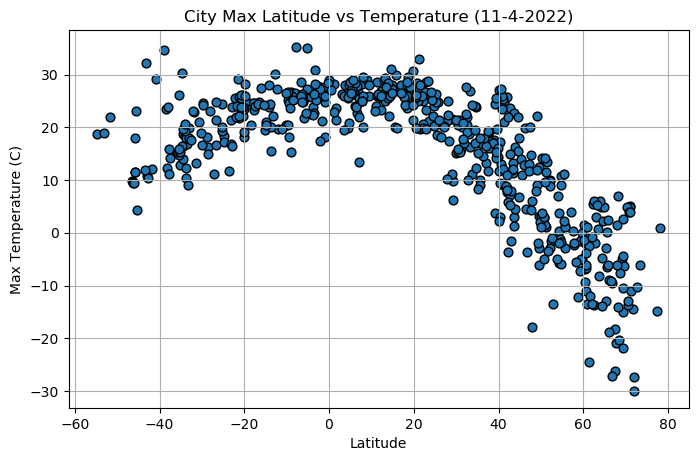

In [32]:
# Build scatter plot for latitude vs. temperature
# Use pandas plot to make the scatter plot, add a title and axis labels:
city_data_df.plot(x='Lat', y='Max Temp', kind = "scatter", edgecolor='k', s=40)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs Temperature (11-4-2022)")
plt.grid()
# Set figure size:
plt.rcParams["figure.figsize"] = (8,5)

# Save the figure:
plt.savefig("output/Fig1.png")


# Show plot:
plt.show()

#### Latitude Vs. Humidity

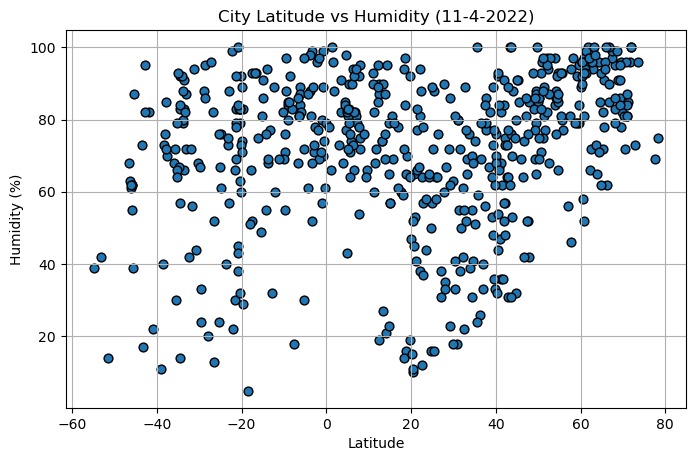

In [33]:
# Build the scatter plots for latitude vs. humidity
# Use pandas plot to make the scatter plot, add a title and axis labels:
city_data_df.plot(x='Lat', y='Humidity', kind = "scatter", edgecolor='k', s=40)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (11-4-2022)")
plt.grid()

# Save the figure
plt.savefig("output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

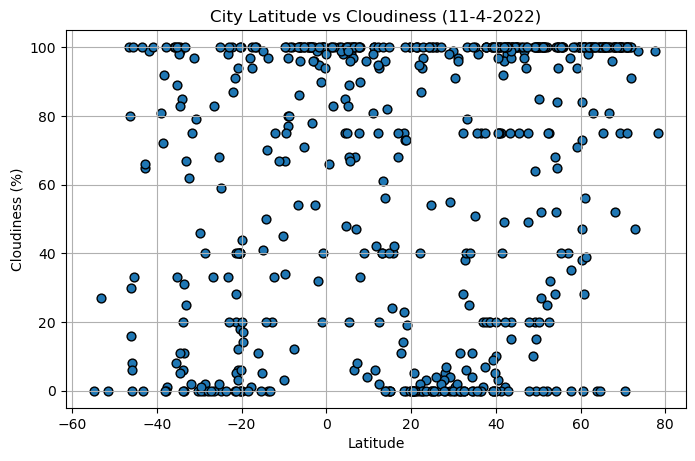

In [34]:
# Build the scatter plots for latitude vs. cloudiness
# Use pandas plot to make the scatter plot, add a title and axis labels:
city_data_df.plot(x='Lat', y='Cloudiness', kind = "scatter", edgecolor='k', s=40)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (11-4-2022)")
plt.grid()

# Save the figure
plt.savefig("output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

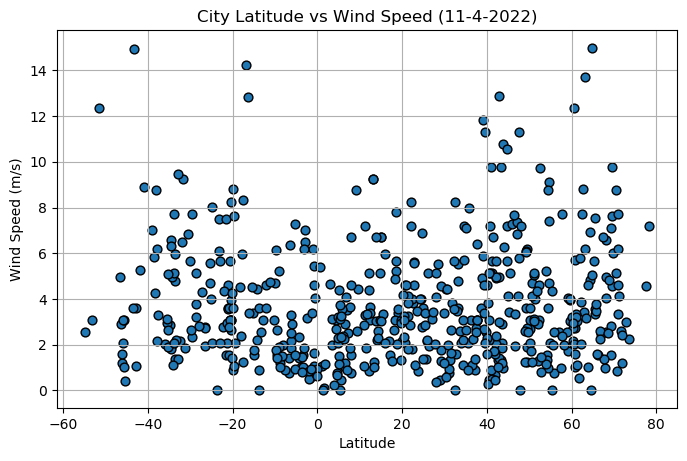

In [35]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(x='Lat', y='Wind Speed', kind = "scatter", edgecolor='k', s=40)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed (11-4-2022)")
plt.grid()

# Save the figure
plt.savefig("output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Define a function to create Linear Regression plots
def reg_plot(x_vals, y_vals, eq_coord, y_label, title):
    # Run the linear regression:
    slope, int, r, p, std_err = linregress(x_vals,y_vals)
    # Create the fitted values for the line of best fit:
    line_fit = (slope * x_vals) + int 
    # Create the equation for the line of best fit:
    line_eq = f"y={round(slope,2)}x + {round(int,2)}"
    # Print the corr (r-value):
    print(f"The r-value is: {r}")
    # Create a scatter plot and plot the regression line:
    plt.scatter(x_vals,y_vals)
    plt.plot(x_vals, line_fit, color="r")
    plt.annotate(line_eq, eq_coord,fontsize=15, color ="r")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pravia,43.4906,-6.1508,11.38,76,20,2.06,ES,1667676596
1,norman wells,65.2820,-126.8329,-12.98,72,75,5.66,CA,1667676596
4,butaritari,3.0707,172.7902,26.35,73,100,4.66,KI,1667676597
5,tiksi,71.6872,128.8694,-14.43,96,100,2.61,RU,1667676598
8,umm lajj,25.0213,37.2685,24.75,57,100,3.59,SA,1667676599


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,atuona,-9.8000,-139.0333,25.18,71,67,6.15,PF,1667676597
3,busselton,-33.6500,115.3333,10.45,83,0,4.80,AU,1667676597
6,noumea,-22.2763,166.4572,25.56,99,100,2.78,NC,1667676023
7,vaini,-21.2000,-175.2000,24.09,83,40,3.60,TO,1667676598
13,ancud,-41.8697,-73.8203,12.17,82,99,5.27,CL,1667676601


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8566749211969426


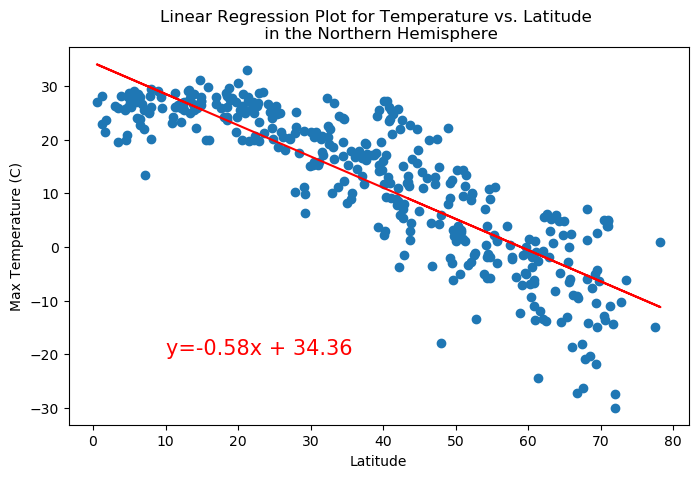

In [52]:
# Linear regression on Northern Hemisphere
# Use reg_plot function to make full plot:
reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], (10,-20), 
        "Max Temperature (C)", "Linear Regression Plot for Temperature vs. Latitude \n in the Northern Hemisphere")

The r-value is: 0.5959786407772226


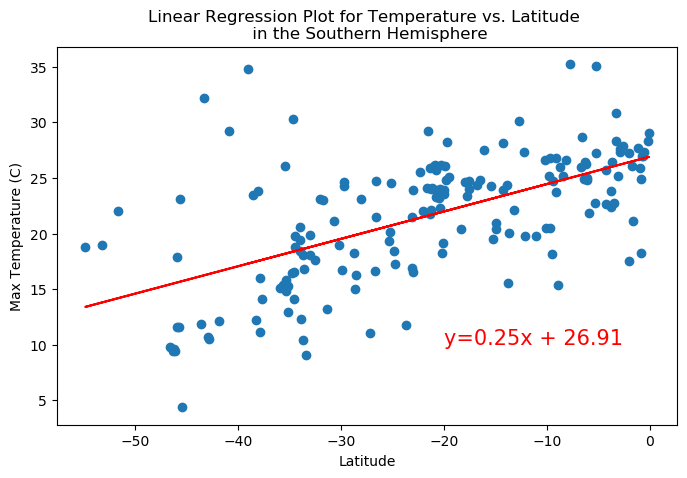

In [53]:
# Linear regression on Southern Hemisphere
reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], (-20,10), 
        "Max Temperature (C)", "Linear Regression Plot for Temperature vs. Latitude \n in the Southern Hemisphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2861445910106671


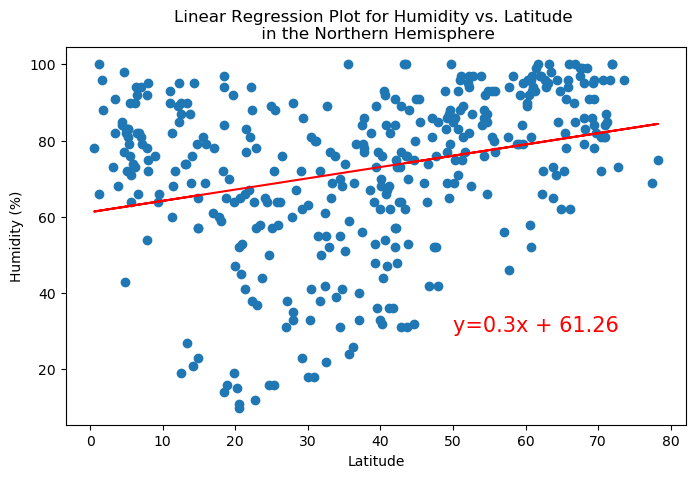

In [56]:
# Northern Hemisphere
reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], (50,30), 
        "Humidity (%)", "Linear Regression Plot for Humidity vs. Latitude \n in the Northern Hemisphere")

The r-value is: 0.27355794503659625


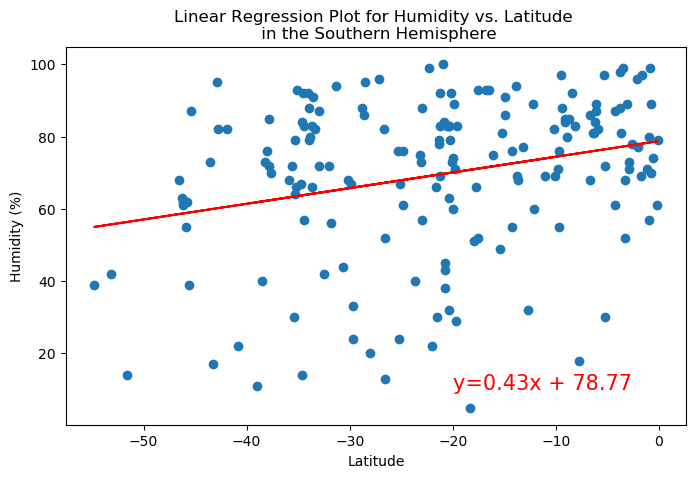

In [54]:
# Southern Hemisphere
reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (-20,10), 
        "Humidity (%)", "Linear Regression Plot for Humidity vs. Latitude \n in the Southern Hemisphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2181657147626314


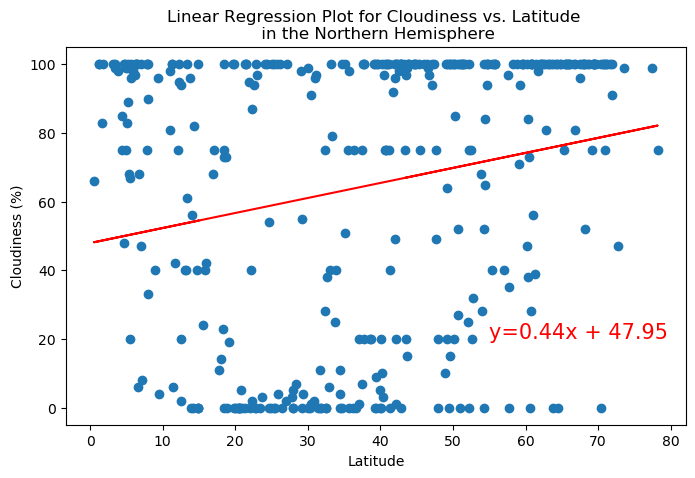

In [59]:
# Northern Hemisphere
reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], (55,20), 
        "Cloudiness (%)", "Linear Regression Plot for Cloudiness vs. Latitude \n in the Northern Hemisphere")

The r-value is: 0.3192073090927437


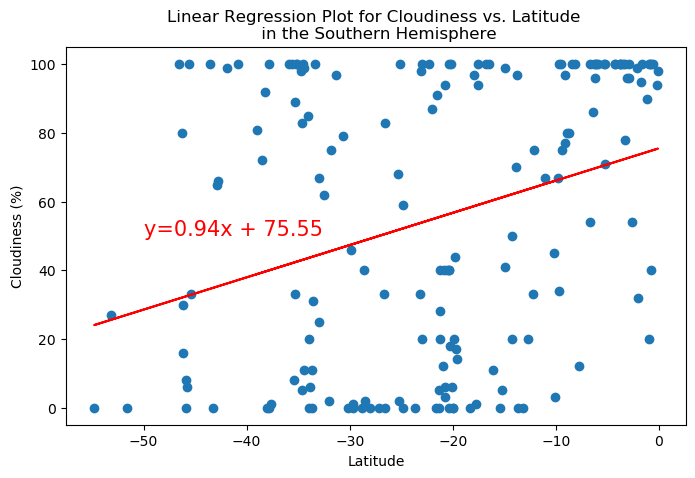

In [61]:
# Southern Hemisphere
reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], (-50,50), 
        "Cloudiness (%)", "Linear Regression Plot for Cloudiness vs. Latitude \n in the Southern Hemisphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.174668619283396


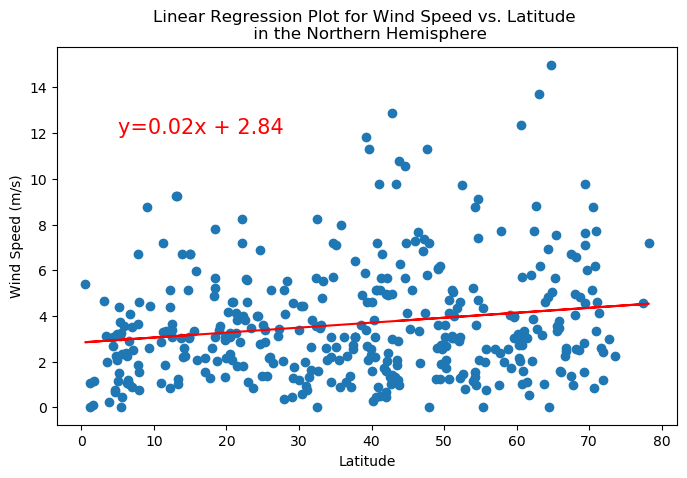

In [66]:
# Northern Hemisphere
reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], (5,12), 
        "Wind Speed (m/s)", "Linear Regression Plot for Wind Speed vs. Latitude \n in the Northern Hemisphere")

The r-value is: -0.21508464369789296


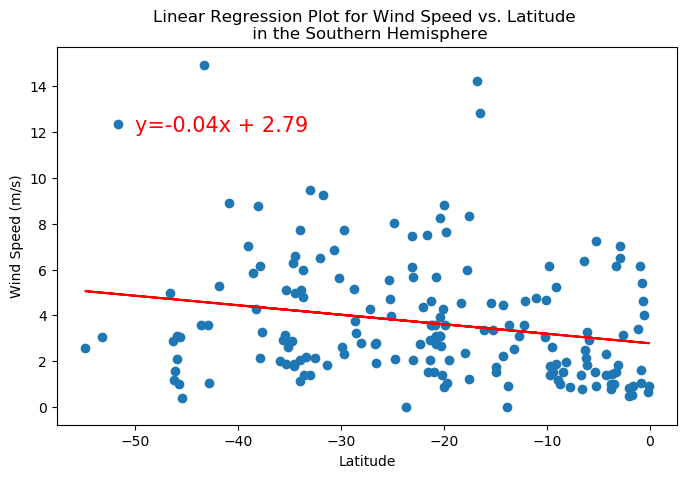

In [64]:
# Southern Hemisphere
reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (-50,12), 
        "Wind Speed (m/s)", "Linear Regression Plot for Wind Speed vs. Latitude \n in the Southern Hemisphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE